In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import lightkurve as lk

In [2]:
def plot_in_out_TPF(tpf,  T0):
    
    tpf_list = [tpf.flux.value]
    t_list = [tpf.time.value]
    T0_list = [T0]
    tpf_pipeline_mask = tpf.pipeline_mask
    
    plt.figure(figsize=(9,2.5*len(T0_list)))

    plt.tight_layout()

    count = 0 # keep track of how many images have been plotted to that they appear on a subgrid of plots which has three columns

    # loop through all of the list of PCA corrected flux vs time arrays for each marked transit-event
    for idx, tpf_filt in enumerate(tpf_list): # idx is for each maked transit-event

        T0 = T0_list[idx] # the time of the transit-like event
        t = t_list[idx] # the time array

        intr = abs(T0-t) < 0.25  # create a mask of the in transit times
        oot = (abs(T0-t) < 0.5) * (abs(T0-t) < 0.3)  # create a mask of the out of transit times
        
        img_intr = tpf_filt[intr,:,:].sum(axis=0)/float(intr.sum()) # apply the masks and normalize the flux
        img_oot = tpf_filt[oot,:,:].sum(axis=0)/float(oot.sum())
        img_diff = img_oot-img_intr # calculate the diffefence image (out of transit minus in-transit)

        images = [img_intr, img_oot, img_diff]
        titles = [
            f"t = {T0} days \n In Transit Flux (e-/cadence)",
            "Out of Transit Flux (e-/cadence)",
            "Difference Flux (e-/cadence)",
        ]

        
        # ---- PLOT -------

        for k in range(3):
            count += 1 # add to the count before each plot
            ax = plt.subplot(len(T0_list), 3, count)
            plt.axis("off")
            im = plt.imshow(images[k], cmap=plt.cm.viridis, origin = "lower")
            plt.colorbar(im)
            plt.title(titles[k], fontsize = 9 )

            for i in range(tpf_pipeline_mask.shape[0]):
                for j in range(tpf_pipeline_mask.shape[1]):
                    if tpf_pipeline_mask[i, j]:
                        rect = Rectangle((j - 0.5, i - 0.5), 1, 1,
                            linewidth=0.5, edgecolor='red', facecolor='none')
                        ax.add_patch(rect)

    plt.subplots_adjust(wspace = 0)
    plt.tight_layout()
    plt.show()
    

In [34]:
TIC = "TIC 50309953"

search_result = lk.search_targetpixelfile(TIC, author="SPOC", sector = 1)[0]
tpf = search_result.download()
tpf.plot(aperture_mask="pipeline")

sector_data = lk.search_lightcurve(TIC, author = "SPOC", sector = 1)[0]

lc = sector_data.download()
lc.plot(linewidth = 0, marker = ".", color = "black", alpha = 0.3)
plt.show()

IndexError: index 0 out of range for table with length 0

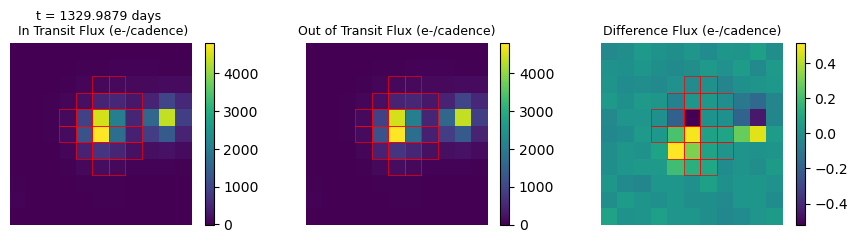

In [32]:
T0 = 1329.9879

plot_in_out_TPF(tpf, T0)